In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Read in an image
import numpy as np
from PIL import Image

# Youll need to put an image here. I've got a picture of apples
img = Image.open("../../assets/test_imgs/apples.png").convert("L")
img.load()
img = np.asarray(img)

In [22]:
# Resize the image to something better
from skimage.transform import resize
img = resize(img, (128, 128), anti_aliasing=True)

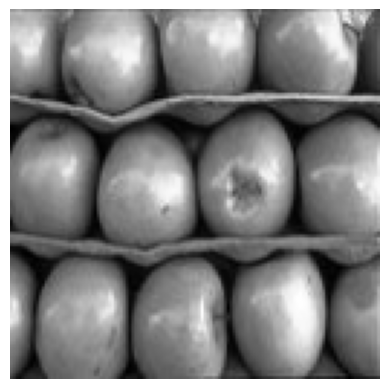

In [23]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap="gray")
_ = plt.axis("off")

In [24]:
# We'll artificially create some patches by cropping the image into smaller pieces
from skimage.util import view_as_windows

patches = view_as_windows(img, (32, 32), step=32)

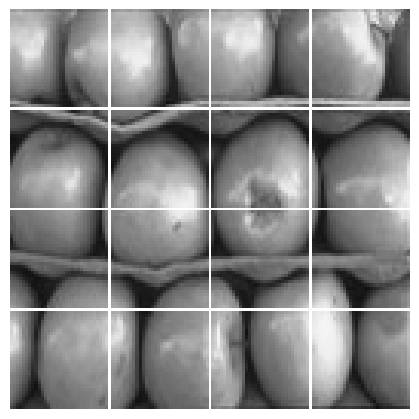

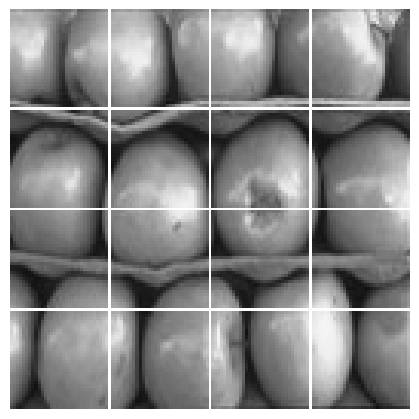

In [25]:
def plot_grid(patches: list[list[np.ndarray]]) -> plt.Figure:
    fig, axes = plt.subplots(4, 4, figsize=(4, 4))
    for axes_row, patches_row in zip(axes, patches):
        for axis, patch in zip(axes_row, patches_row):
            axis.imshow(patch, cmap="gray", vmin=0, vmax=1)
            axis.axis("off")

    fig.subplots_adjust(hspace=0.03, wspace=0.03, left=0, right=1, top=1, bottom=0)

    return fig

plot_grid(patches)

In [ ]:
# Choose patches randomly
from current_denoising.generation import quilting

# I expect to pass a flat list of patches to my function
patches = patches.reshape(-1, 32, 32)

target_size = (256, 256)
patch_overlap = 0

rng = np.random.default_rng(0)

random_patch_grid = quilting.randomly_choose_patches(
    patches, target_size, patch_overlap, allow_rotation=False, rng=rng
)

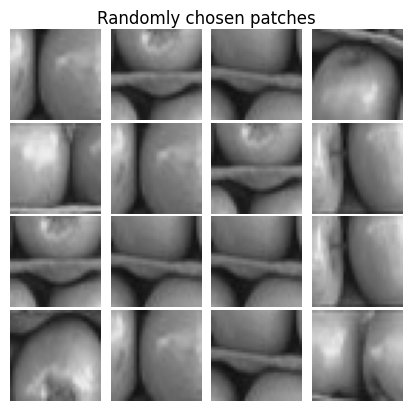

In [ ]:
fig = plot_grid(random_patch_grid)
fig.suptitle("Randomly chosen patches")
fig.subplots_adjust(top=0.93)

In [41]:
patch_overlap = 4
optimal_patch_grid = quilting.optimally_choose_patches(
    patches, target_size, patch_overlap, allow_rotation=False, rng=rng
)

-inf 0.030285057870832195
0.030285057870832195 0.04746515110927868
0.04746515110927868 0.11809794526483826
0.11809794526483826 0.1444832197922113
0.1444832197922113 0.15346354761620207
-inf 0.030285057870832195
0.030285057870832195 0.04746515110927868
0.04746515110927868 0.11809794526483826
0.11809794526483826 0.1444832197922113
0.1444832197922113 0.15346354761620207
-inf 0.030285057870832195
0.030285057870832195 0.04746515110927868
0.04746515110927868 0.11809794526483826
0.11809794526483826 0.1444832197922113
0.1444832197922113 0.15346354761620207
-inf 0.030285057870832195
0.030285057870832195 0.04746515110927868
0.04746515110927868 0.11809794526483826
0.11809794526483826 0.1444832197922113
0.1444832197922113 0.15346354761620207
-inf 0.030285057870832195
0.030285057870832195 0.04746515110927868
0.04746515110927868 0.11809794526483826
0.11809794526483826 0.1444832197922113
0.1444832197922113 0.15346354761620207
-inf 0.030285057870832195
0.030285057870832195 0.04746515110927868
0.047465

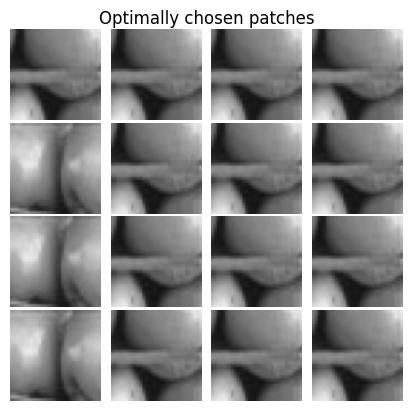

In [43]:
fig = plot_grid(optimal_patch_grid)
fig.suptitle("Optimally chosen patches")
fig.subplots_adjust(top=0.93)